In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

In [7]:
df = pd.read_csv('direct_marketing_dataset.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df = df.drop('duration', axis=1)

In [9]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
gnb = GaussianNB()
gnb.fit(X_train_encoded, y_train)

GaussianNB()

In [14]:
predictions=gnb.predict(X_test_encoded)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, pos_label='yes')
precision = precision_score(y_test, predictions, pos_label='yes')
col=['Accuracy', 'Recall', 'Precision']
metric_df = pd.DataFrame(col,[accuracy, recall, precision]).reset_index()

In [15]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.834347008736039
Precision: 0.35658914728682173
Recall: 0.46379468377635197


In [16]:
conf = confusion_matrix(y_test, predictions)
class_labels = ['0', '1']

conf_matrix = pd.DataFrame(conf, index=class_labels)

In [17]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
      0    1
0  7039  913
1   585  506


In [19]:
print(classification_report(y_test,
                            predictions,
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7952
           1       0.36      0.46      0.40      1091

    accuracy                           0.83      9043
   macro avg       0.64      0.67      0.65      9043
weighted avg       0.85      0.83      0.84      9043



In [26]:
most_informative_features = pd.DataFrame([gnb.feature_importances_], columns=X_train.columns)

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

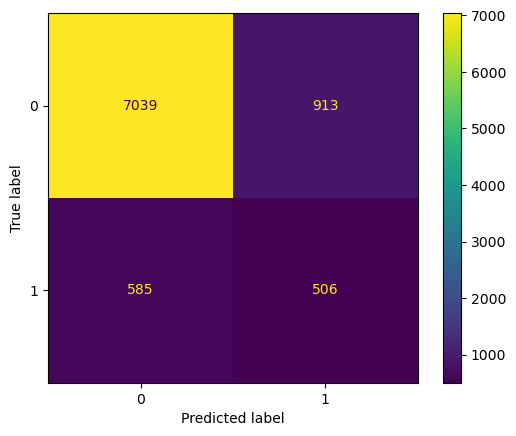

In [21]:
cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=gnb.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('0','1')
                             )

disp.plot();

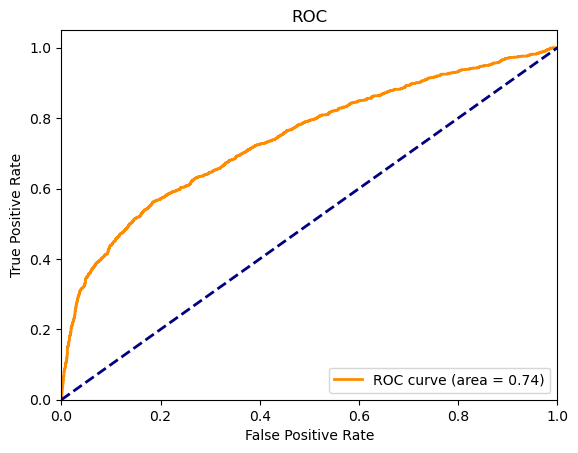

In [24]:
y_scores = gnb.predict_proba(X_test_encoded)[:, 1] 
 
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label='yes')
roc_auc = auc(fpr, tpr)
 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
important_features= pd.DataFrame(data=np.transpose(gnb.fit(X_train_encoded, y_train)).feature_log_prob_).astype("float32"),index=X_train_encoded.columns

SyntaxError: unmatched ')' (1451367027.py, line 1)